### import necessary library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [15]:
df = pd.read_csv('25152746-spam.tsv', sep='\t')

In [16]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [17]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


### exploratory data analysis

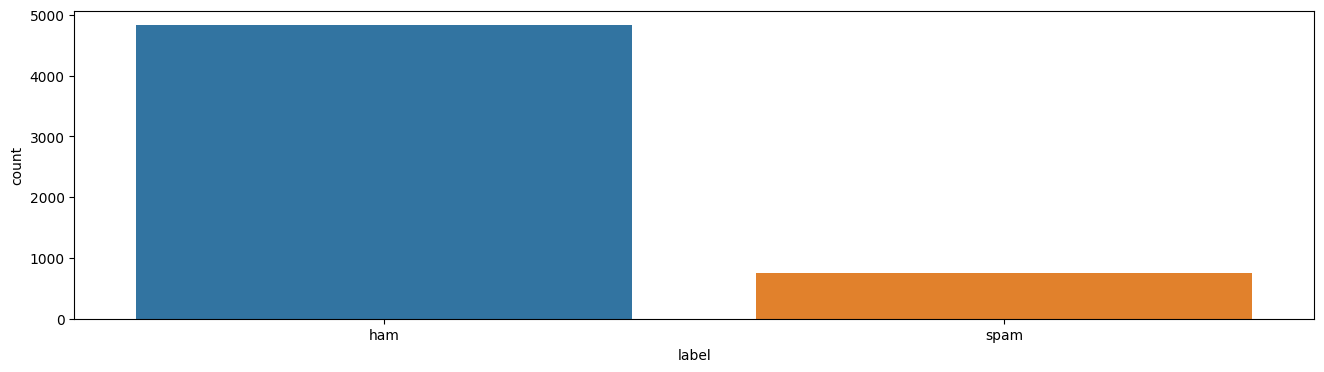

In [18]:
plt.figure(figsize=(16, 4))
sns.countplot(data=df, x='label')
plt.show()

In [33]:
print(df['label'].value_counts()/len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64


In [13]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [34]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [37]:
ham = ham.sample(len(spam))
len(ham), len(spam)

(747, 747)

In [38]:
df = ham.append(spam, ignore_index=True)

C:\Users\yandiher\AppData\Local\Temp\ipykernel_2432\2145385498.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = ham.append(spam, ignore_index=True)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1494 non-null   object
 1   message  1494 non-null   object
 2   length   1494 non-null   int64 
 3   punct    1494 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.8+ KB


In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x = df['message']
y = df['label']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)